<a href="https://colab.research.google.com/github/ardalanebrahimi/EDU/blob/master/Malware_detection_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
import zipfile
import keras
import os,shutil
from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.layers import Activation
from keras import optimizers
from keras.utils import np_utils
import numpy as np
import tensorflow as tf

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#import urllib.request
#urllib.request.urlretrieve('https://uc1b3eeff1a388863e54f89377fd.dl.dropboxusercontent.com/cd/0/get/Abh-mhMNnJRL3X1Nx19DiwvKfvy1OlDYeFvvRgwOHehOxkpKwmhVpZGluutk-MVo4LqAzakk2y6M6fN88EODsvhP9iJtunPCOVbRf34quhpN-bmPQd3BzBiiIVLdp4u3CC0/file?_download_id=2719336305946158432021351566118605042404785170120585035297908900107755&_notify_domain=www.dropbox.com&dl=1', '/content/drive/My Drive/malimg_dataset.zip')

('/content/drive/My Drive/malimg_dataset.zip',
 <http.client.HTTPMessage at 0x7f8e44854e10>)

In [0]:
if os.path.isdir(base_dir):
  shutil.rmtree(base_dir)
if os.path.isdir(base_dir):
  os.rmdir(base_dir) 
  

In [0]:
import zipfile
with zipfile.ZipFile('/content/drive/My Drive/malimg_dataset.zip', 'r') as zip_ref:
    #zip_ref.extractall('/content/drive/My Drive/malimg_dataset')
    zip_ref.extractall('/content/malimg_dataset')

In [0]:
original_data_dir = '/content/malimg_dataset/malimg_paper_dataset_imgs'
base_dir = '/content/malimg_dataset'

#if os.path.isdir(base_dir):
#  shutil.rmtree(base_dir)
#if os.path.isdir(base_dir):
#  os.rmdir(base_dir) 
  
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')


In [0]:
class_dir_list = list(os.listdir(original_data_dir)).sort()

if os.path.isdir(base_dir) == False:
  os.mkdir(base_dir)
if os.path.isdir(train_dir) == False:
  os.mkdir(train_dir)
  #os.mkdir(test_dir)
  os.mkdir(validation_dir)
  
  
  for cl in class_dir_list :
    os.mkdir(os.path.join(train_dir,cl))
    os.mkdir(os.path.join(validation_dir,cl))

In [0]:
def list_files(directory):
  return (f for f in os.listdir(directory))

def copy_classes(class_objs, cl, dest_dir ) :
  src_dir = os.path.join(original_data_dir,cl)
  for obj in class_objs:
    src_file = os.path.join(src_dir, obj)
    dst_dir = os.path.join(dest_dir, obj)
    shutil.copyfile(src_file, dst_dir)
    
for cl in class_dir_list :
  if cl != 'malimg_dataset_readme.txt' : 
    class_data_list = list(list_files(os.path.join(original_data_dir,cl)))
    portion = int(np.floor((len(class_data_list)*8/10)))
    copy_classes(class_data_list[:portion],cl,os.path.join(train_dir, cl))
    copy_classes(class_data_list[portion:],cl,os.path.join(validation_dir, cl))


In [0]:
junk1 = os.path.join(train_dir, 'malimg_dataset_readme.txt')
junk2 = os.path.join(validation_dir, 'malimg_dataset_readme.txt')

if os.path.isdir(base_dir):
  shutil.rmtree(junk1)
  shutil.rmtree(junk2)

In [0]:
def create_model(shape = 150, samePadding = False):
  _padding = 'same' if samePadding else 'valid'
  _model = models.Sequential()
  _model.add(layers.Conv2D(10, (3, 3), activation='relu', input_shape = (shape, shape, 3), padding= _padding))
  _model.add(layers.MaxPooling2D(2, 2))
  _model.add(layers.Conv2D(64, (3, 3), activation='relu', padding=_padding))
  _model.add(layers.MaxPooling2D(2, 2))
  _model.add(layers.Conv2D(64, (3, 3), activation='relu', padding=_padding))
  _model.add(layers.MaxPooling2D(2, 2))
  _model.add(layers.Conv2D(128, (3, 3), activation='relu', padding=_padding))
  _model.add(layers.MaxPooling2D(2, 2))
  _model.add(layers.Flatten())
  _model.add(layers.Dense(512, activation='relu'))
  _model.add(layers.Dense(25, activation='softmax'))
  
  #alware_Model = models.Sequential()
  #alware_Model.add(layers.Conv2D(32, kernel_size=(3,3),input_shape=(shape,shape,3),))
  #alware_Model.add(layers.LeakyReLU(.1))
  #alware_Model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  #alware_Model.add(layers.Conv2D(64, kernel_size=(3,3),))
  #alware_Model.add(layers.LeakyReLU(.1))
  #alware_Model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  #alware_Model.add(layers.Conv2D(64, (3, 3)))
  #alware_Model.add(layers.LeakyReLU(.1))
  #alware_Model.add(layers.Dense(128 ))
  #alware_Model.add(layers.LeakyReLU(.1))
  #alware_Model.add(layers.Dropout(0.4))
  #alware_Model.add(layers.Flatten())
  #alware_Model.add(layers.Dense(25 ))

  opt = keras.optimizers.rmsprop(lr=1e-3)
  _model.compile(loss='categorical_crossentropy',
               optimizer= opt,
               metrics = ['accuracy'])
  return _model

#################################################
def fit_model_gen(_model,
                  _train_datagen = ImageDataGenerator(rescale=1./255),
                  _train_batch_size=20,
                  _epochs = 30,
                  _shuffle = False,
                  _modelName = 'malimg_model.h5',
                  _shape=150):
                 
  test_datagen = ImageDataGenerator(rescale=1./255)

  train_generator = _train_datagen.flow_from_directory(
      train_dir,
      target_size=(_shape,_shape),
      batch_size=20,
      class_mode = 'categorical')


  validation_generator = test_datagen.flow_from_directory(
      validation_dir,
      target_size=(_shape,_shape),
      batch_size=_train_batch_size,
      class_mode = 'categorical')

  _history = _model.fit_generator(
      train_generator,
      steps_per_epoch = 100,
      epochs = _epochs,
      validation_data=validation_generator,
      validation_steps=50,
      shuffle=_shuffle,
      workers=4)
  
  model.save(_modelName)
  model.save('/content/drive/My Drive/malimg_dataset/' + _modelName)
  return _history

#################################################
def train_val_by_metric(history,metric):
  history_dict = history.history
  #history_dict.keys()
  values = history_dict[metric]
  val_values = history_dict['val_'+metric]

  epochs = range(1, len(values) + 1)
  
  plt.plot(epochs, values, 'bo', label= 'Training '+metric)
  plt.plot(epochs, val_values, 'b', label= 'Validation '+metric)
  metricTitle = 'Loss' if metric == 'loss' else 'Accuracy'
  plt.title('Training and validation '+metricTitle)
  plt.xlabel('Epochs')
  plt.ylabel(metricTitle)
  plt.legend()

  plt.show()
###################################################
def train_val_res(history):
  train_val_by_metric(history,'loss')
  train_val_by_metric(history,'acc')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 150, 150, 10)      280       
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 75, 75, 10)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 75, 75, 64)        5824      
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 37, 37, 64)        36928     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 18, 18, 128)       73856     
__________

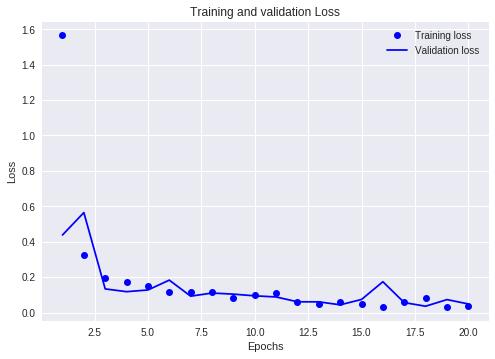

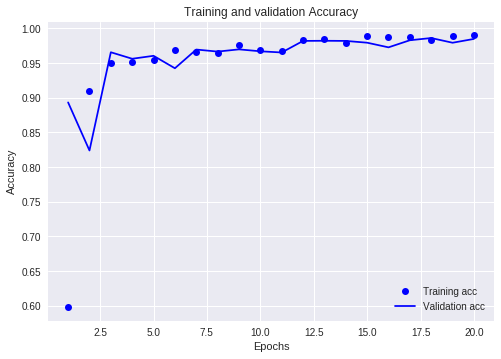

In [30]:
_shape = 150
model = create_model(shape = _shape , samePadding = True)
model.summary()
history = fit_model_gen(model,_shape = _shape,_train_batch_size=64,_epochs = 20,_shuffle = True)
train_val_res(history)

In [0]:
model = tf.keras.models.load_model('/content/drive/My Drive/malimg_dataset/malimg_model.h5')

In [0]:
import cv2
def prepare(filepath):
  IMG_SIZE = 150
  img_array = cv2.imread(filepath)
  new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
  return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

def to_img(mal_path):
  import os
  import imageio
  import array
  import numpy
  f = open(mal_path,'rb');
  ln = os.path.getsize(mal_path);
  width = 512;
  rem = ln%width;
  a = array.array("B");
  a.fromfile(f,ln-rem);
  f.close();
  g = numpy.reshape(a,(int(len(a)/width),width));
  g = numpy.uint8(g);  
  img_path = mal_path+'.png';
  imageio.imwrite(img_path,g);
  return img_path;

def detect_mal_from_binery(mal_path) :
  class_dir_list = list(os.listdir(original_data_dir)).sort()
  mal_img = to_img(mal_path)
  predict_mal_from_img(mal_img)
  
def predict_mal_from_img(mal_img) :
  import ntpath
  prepared_mal_img = prepare(mal_img)
  predicted_mal_class = model.predict([prepared_mal_img])
  intg = get_class_index(predicted_mal_class)
  head, tail = ntpath.split(mal_img)
  mal_name = tail or ntpath.basename(mal_img)
  print(mal_name+' ======> '+class_dir_list[intg])

def get_class_index(predicted_mal_class) : 
  return [np.where(r==1)[0][0] for r in predicted_mal_class][0]

In [199]:
prefix_dir = '/content/malimg_dataset/train'
#print(class_dir_list[get_class_index(model.predict([prepare(os.path.join(prefix_dir,'Adialer.C/0044f0746b812f6b454ce210bc58c572.png'))]))])
#print(class_dir_list[get_class_index(model.predict([prepare(os.path.join(prefix_dir,'Agent.FYI/00221d9f4bfd530abc23314c7b4dd556.png'))]))])
#print(class_dir_list[get_class_index(model.predict([prepare(os.path.join(prefix_dir,'Fakerean/00291c2d292e659e51d32e77194d9196.png'))]))])

predict_mal_from_img(os.path.join(prefix_dir,'Adialer.C/0044f0746b812f6b454ce210bc58c572.png'))
predict_mal_from_img(os.path.join(prefix_dir,'Agent.FYI/00221d9f4bfd530abc23314c7b4dd556.png'))
predict_mal_from_img(os.path.join(prefix_dir,'Fakerean/00291c2d292e659e51d32e77194d9196.png'))

detect_mal_from_binery('/content/PDFXCview.exe')
detect_mal_from_binery('/content/Win32.Cridex')
detect_mal_from_binery('/content/splwow64.exe')
detect_mal_from_binery('/content/winhlp32.exe')

0044f0746b812f6b454ce210bc58c572.png ======> Adialer.C
00221d9f4bfd530abc23314c7b4dd556.png ======> Agent.FYI
00291c2d292e659e51d32e77194d9196.png ======> Fakerean
PDFXCview.exe.png ======> C2LOP.P
Win32.Cridex.png ======> Lolyda.AA3
splwow64.exe.png ======> Swizzor.gen!E
winhlp32.exe.png ======> Swizzor.gen!I
